# **I. Project Introduction**

---



This project utilizes a simulated dataset of **1,000 student records** sourced from *Kaggle*. Each record captures key **lifestyle habits**—such as:

- Study hours  
- Sleep patterns  
- Screen time  
- Diet  
- Mental health  

These lifestyle factors are analyzed in relation to **academic performance**, specifically the **final exam score**.

The dataset is ideal for **educational machine learning applications**, enabling learners to perform:

- Data preprocessing  
- Data visualization  
- Clustering   
- Regression  
- Classification  

You are tasked with analyzing how these lifestyle factors affect student performance and building predictive models based on insights you derive.




---

# **II. Project Goals**

- 🔍 Determine relationships between lifestyle habits and final exam scores  
- 🧠 Discover meaningful student groupings based on lifestyle through clustering  
- 🤖 Build and evaluate models that predict academic performance  
- 📊 Summarize and communicate findings through effective data storytelling





---
# **III. Project Components**



---




## **1. Problem Definition**

---

1.   What Habits and Lifestyle of Students most porminently predict their Exam Performance?
2.   How many significant Types of students (based on habits and lifestyle)  are there (and how well do they perform?
3.  Is there a specific combination of habits and lifestyle that produces a larger effect on exam performance.



## **2. Data Understanding and Preprocessing**

---



### **Loading Data**

---


Mounting data straight from Google Drive

In [484]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
import seaborn as sns
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ColabData/student_habits_performance.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [485]:
# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path)
    print("DataFrame loaded successfully!")
    # Display the first few rows of the DataFrame to verify
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")


DataFrame loaded successfully!


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

### **Data Information Summary**

---



In [486]:
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Unique Values': df.nunique()
})

print(summary)

                              Data Type  Non-Null Count  Null Count  \
student_id                       object            1000           0   
age                               int64            1000           0   
gender                           object            1000           0   
study_hours_per_day             float64            1000           0   
social_media_hours              float64            1000           0   
netflix_hours                   float64            1000           0   
part_time_job                    object            1000           0   
attendance_percentage           float64            1000           0   
sleep_hours                     float64            1000           0   
diet_quality                     object            1000           0   
exercise_frequency                int64            1000           0   
parental_education_level         object             909          91   
internet_quality                 object            1000           0   
mental

### **Patching Missing Data**

---


The data for parental_education_level comes out as NaN when the answer was None. To fix this all 'None' are treated as a unique class

#### **Null Checker**
Rerun Snippet Below to check if any column still considered with Null.

In [487]:
null_columns = df.columns[df.isnull().any()]

# Display sample rows where these columns are null (you can change the number)
for col in null_columns:
    print(f"\n--- Sample nulls in column: '{col}' ---")
    print(df[df[col].isnull()][[col]].sample(n=5, random_state=1))  # change n as needed
# Show rows where any of the columns with nulls has a missing value
df[df[null_columns].isnull().any(axis=1)].head(3)  # show first 10 such rows



--- Sample nulls in column: 'parental_education_level' ---
    parental_education_level
637                      NaN
939                      NaN
497                      NaN
602                      NaN
782                      NaN


student_id  age  gender  study_hours_per_day  social_media_hours  \
10      S1010   19  Female                  4.6                 3.7   
33      S1033   18  Female                  4.0                 0.9   
47      S1047   23  Female                  2.5                 2.9   

    netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10            0.8            No                   77.6          5.8   
33            1.1            No                   99.5          5.8   
47            2.7            No                   83.5          7.0   

   diet_quality  exercise_frequency parental_education_level internet_quality  \
10         Fair                   1                      NaN             Good   
33         Poor                   2                      NaN          Average   
47         Good                   4                      NaN             Good   

    mental_health_rating extracurricular_participation  exam_score  
10                     3                            No        63.3  
33                     5                            No        70.7  
47                     8                           Yes        59.7

In [488]:
#Snippet to replace all missing values in parental_education_level with 'None'
df['parental_education_level'] = df['parental_education_level'].fillna('None')
print(df['parental_education_level'].isnull().sum())  # Should print 0
print(df['parental_education_level'].value_counts(dropna=False))  # Should show "None" counts

0
parental_education_level
High School    392
Bachelor       350
Master         167
None            91
Name: count, dtype: int64


### **Categorical Values**

---


-Values that are binomial in nature will be converted to 0/1

-Values that are categorical in nature (gender) will be converted to numerical value.

-Values that are Oridnal in nature (parental_education_level) will be ordinally mapped

In [ ]:
# 1. Label encode 'gender' as 0, 1, 2
gender_map = {val: idx for idx, val in enumerate(df['gender'].unique())}
df['gender'] = df['gender'].map(gender_map)

# 2. Map binary yes/no to 1/0
binary_map = {'Yes': 1, 'No': 0}
df['part_time_job'] = df['part_time_job'].map(binary_map)
df['extracurricular_participation'] = df['extracurricular_participation'].map(binary_map)

# 3. Apply ordinal mappings (custom maps)
diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
parent_edu_map = {'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3}
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}

df['diet_quality'] = df['diet_quality'].map(diet_map)
df['parental_education_level'] = df['parental_education_level'].map(parent_edu_map)
df['internet_quality'] = df['internet_quality'].map(internet_map)

In [490]:
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Unique Values': df.nunique()
})
print(summary)
df.head()

                              Data Type  Non-Null Count  Null Count  \
student_id                       object            1000           0   
age                               int64            1000           0   
gender                            int64            1000           0   
study_hours_per_day             float64            1000           0   
social_media_hours              float64            1000           0   
netflix_hours                   float64            1000           0   
part_time_job                     int64            1000           0   
attendance_percentage           float64            1000           0   
sleep_hours                     float64            1000           0   
diet_quality                      int64            1000           0   
exercise_frequency                int64            1000           0   
parental_education_level          int64            1000           0   
internet_quality                  int64            1000           0   
mental

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23       0                  0.0                 1.2   
1      S1001   20       0                  6.9                 2.8   
2      S1002   21       1                  1.4                 3.1   
3      S1003   23       0                  1.0                 3.9   
4      S1004   19       0                  5.0                 4.4   

   netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0            1.1              0                   85.0          8.0   
1            2.3              0                   97.3          4.6   
2            1.3              0                   94.8          8.0   
3            1.0              0                   71.0          9.2   
4            0.5              0                   90.9          4.9   

   diet_quality  exercise_frequency  parental_education_level  \
0             1                   6                         3   
1             2                   6                         1   
2             0                   1                         1   
3             0                   4                         3   
4             1                   3                         3   

   internet_quality  mental_health_rating  extracurricular_participation  \
0                 1                     8                              1   
1                 1                     8                              0   
2                 0                     1                              0   
3                 2                     1                              1   
4                 2                     1                              0   

   exam_score  
0        56.2  
1       100.0  
2        34.3  
3        26.8  
4        66.4

### **Scaling**

We drop the student_ids and scale the rest of the df and save it as scaled_df

---



In [491]:
# Keep student_id aside
student_ids = df['student_id']
features = df.drop(columns=['student_id'])

# Scale features only
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

### **Feature Engineering**

---


We will add new faturess which is an amalgamation of good categories or bad categories. Such as:

-Overall wellness is the combination of sleep, diet, exercise, and mental health

-Disctractors as the combination of all screen-time

-Productive hours are all entries directly related to educational performance


In [492]:
#Overall wellness is the combination of sleep, diet, exercise, and mental health
scaled_features['overall_wellness'] = scaled_features[
    ['sleep_hours', 'diet_quality', 'exercise_frequency', 'mental_health_rating']
].mean(axis=1)
#Distractors is the combination of all recreational time spent on-screen.
scaled_features['distractors'] = scaled_features[
    ['social_media_hours', 'netflix_hours']
].mean(axis=1)
#Productive hours is time spent in direct relation to improving test scores
scaled_features['productive_hours'] = scaled_features[
    ['study_hours_per_day', 'attendance_percentage']
].mean(axis=1)

# Combine back if needed later
final_df = pd.concat([student_ids, scaled_features], axis=1)

scaled_features.head()


age    gender  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.084551 -0.976163            -2.418068           -1.114064      -0.669750   
1 -0.215870 -0.976163             2.281707            0.251315       0.446965   
2  0.217604  0.763878            -1.464491            0.507324      -0.483631   
3  1.084551 -0.976163            -1.736942            1.190013      -0.762810   
4 -0.649344 -0.976163             0.987566            1.616694      -1.228108   

   part_time_job  attendance_percentage  sleep_hours  diet_quality  \
0      -0.523341               0.092426     1.248120     -0.266175   
1      -0.523341               1.401696    -1.525661      1.112970   
2      -0.523341               1.135584     1.248120     -1.645320   
3      -0.523341              -1.397800     2.227102     -1.645320   
4      -0.523341               0.720450    -1.280916     -0.266175   

   exercise_frequency  parental_education_level  internet_quality  \
0            1.461166                  1.616760         -0.392302   
1            1.461166                 -0.681406         -0.392302   
2           -1.008689                 -0.681406         -1.768800   
3            0.473224                  1.616760          0.984196   
4           -0.020747                  1.616760          0.984196   

   mental_health_rating  extracurricular_participation  exam_score  \
0              0.900186                       1.464464   -0.793922   
1              0.900186                      -0.682844    1.800846   
2             -1.559339                      -0.682844   -2.091307   
3             -1.559339                       1.464464   -2.535616   
4             -1.559339                      -0.682844   -0.189661   

   overall_wellness  distractors  productive_hours  
0          0.835824    -0.891907         -1.162821  
1          0.487165     0.349140          1.841702  
2         -0.741307     0.011846         -0.164453  
3         -0.126083     0.213602         -1.567371  
4         -0.781794     0.194293          0.854008

## **3. Exploratory Data Analysis**

---



### **Feature Histogram**

---



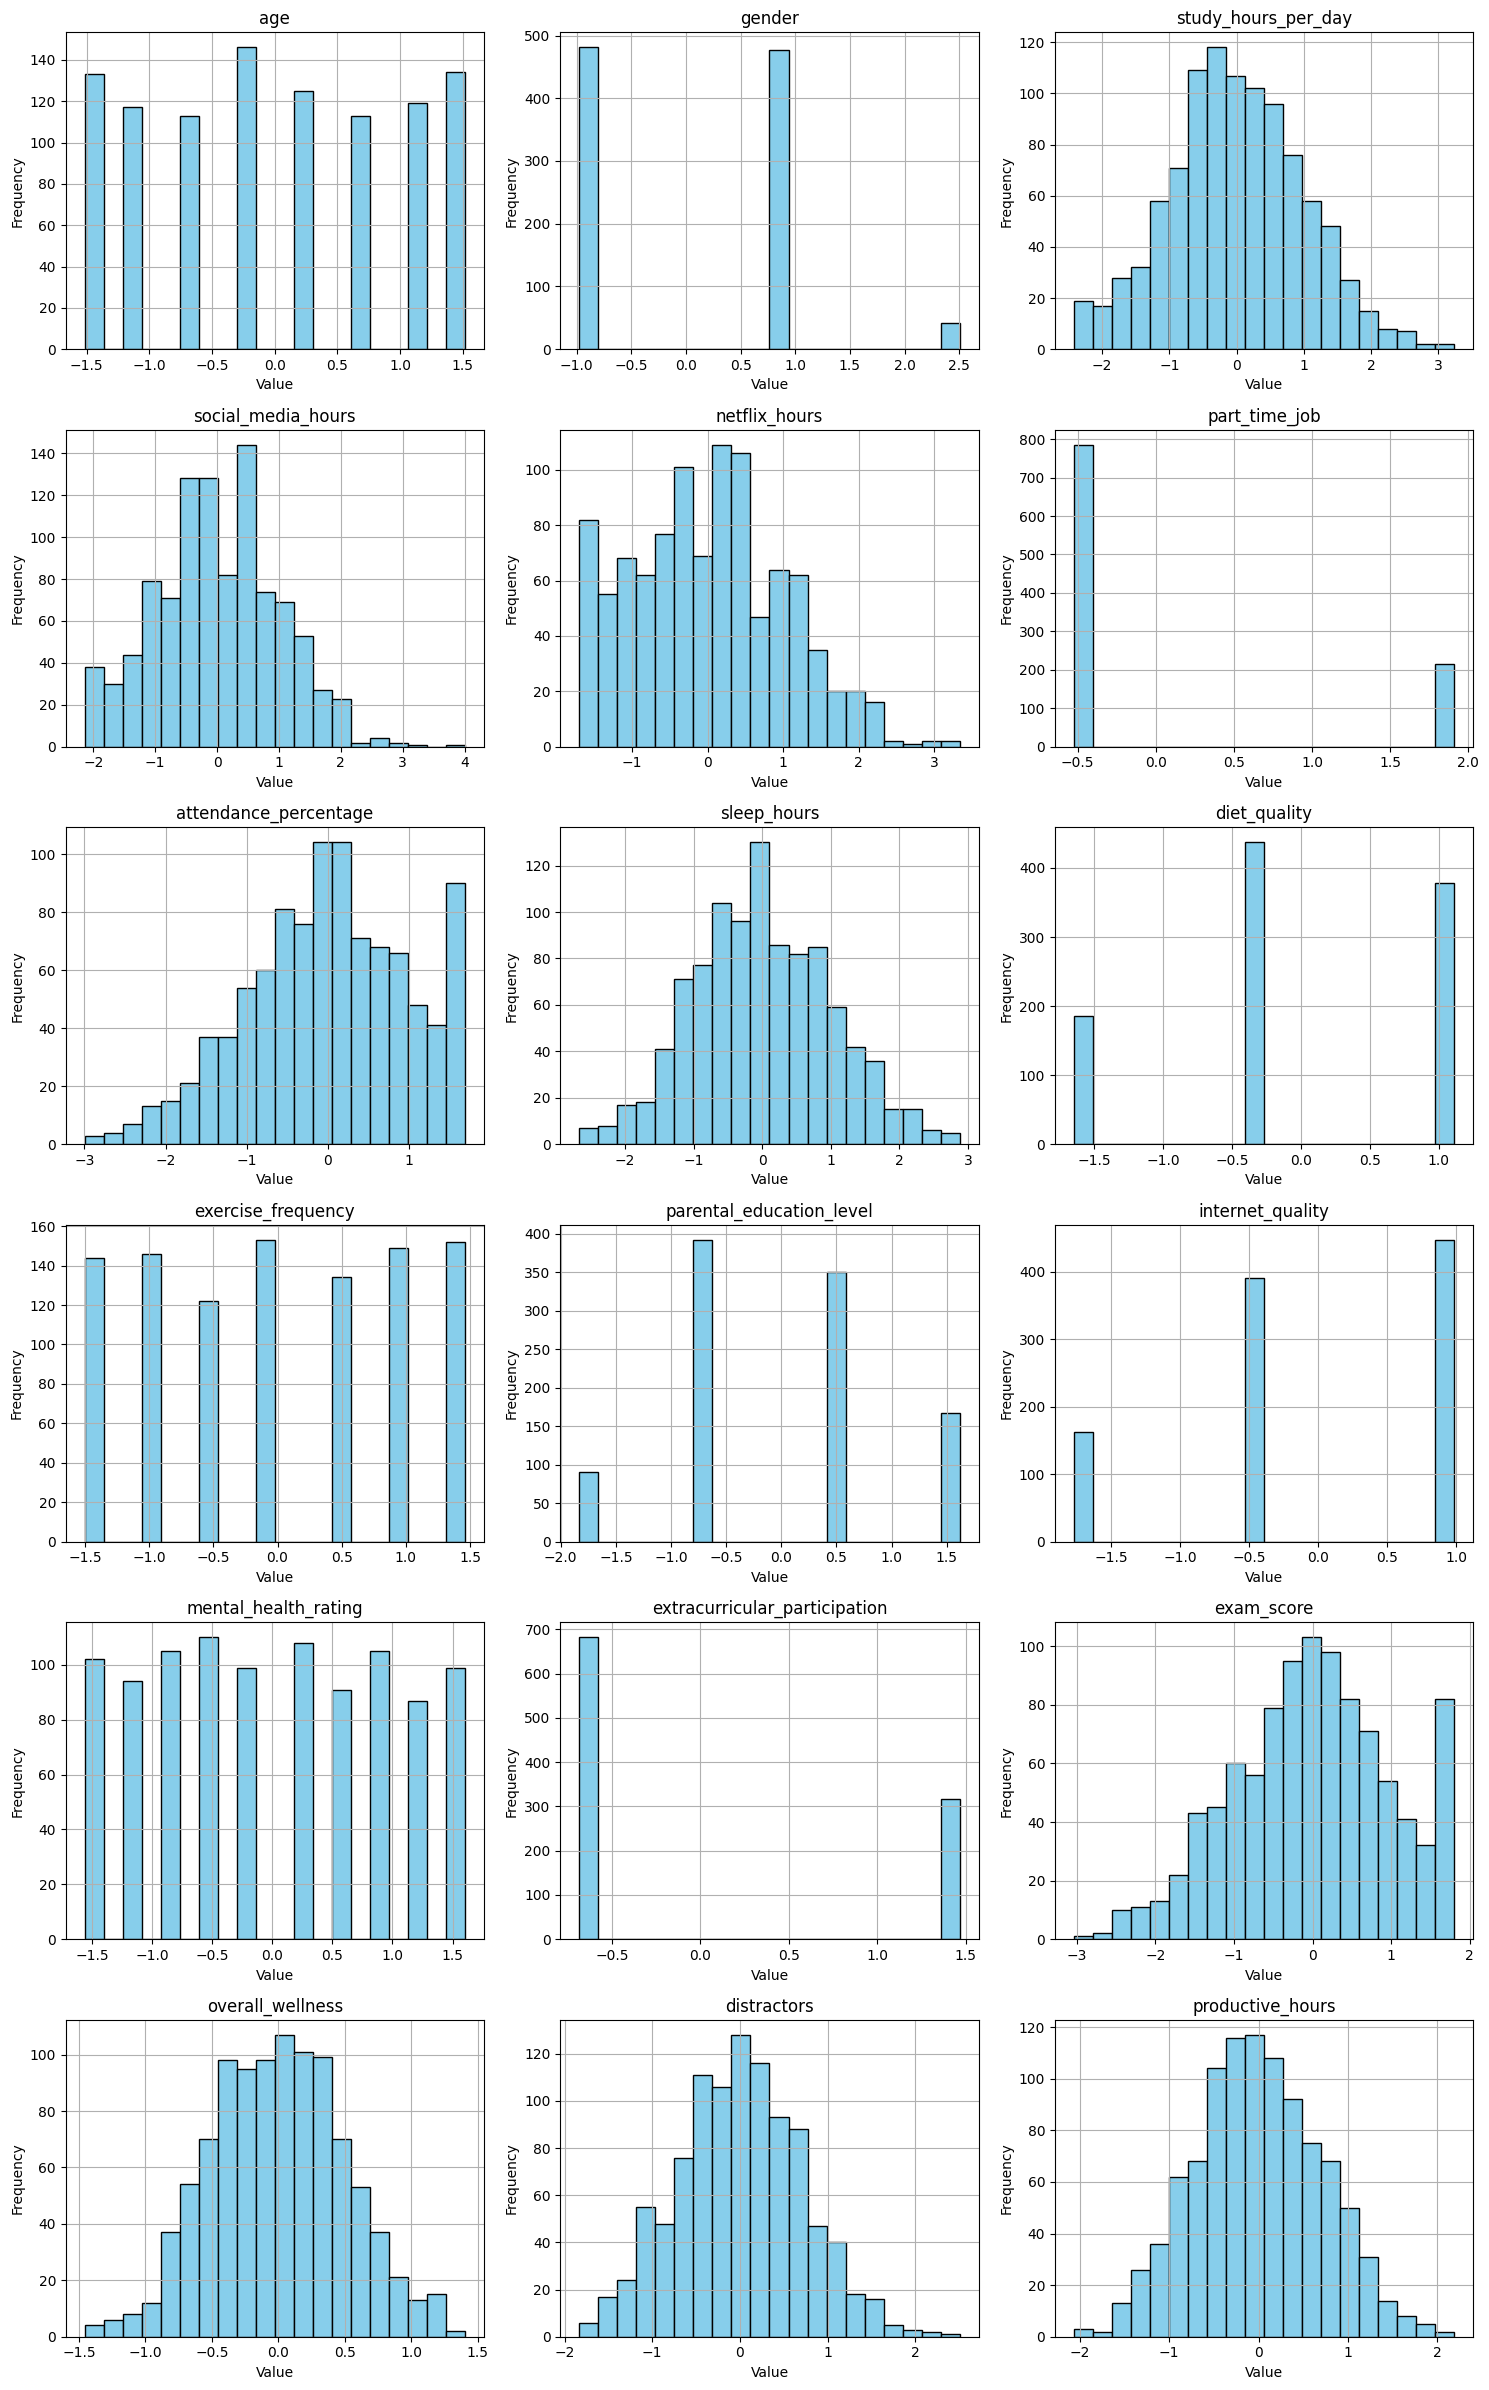

In [493]:
# Number of features
num_features = scaled_features.shape[1]

# Determine grid size (square or rectangular layout)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_features / cols)

# Set up the grid
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten to 1D for easy looping

# Plot each feature
for i, column in enumerate(scaled_features.columns):
    axes[i].hist(scaled_features[column], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Feature vs Exam Score Scatter Plot**

---



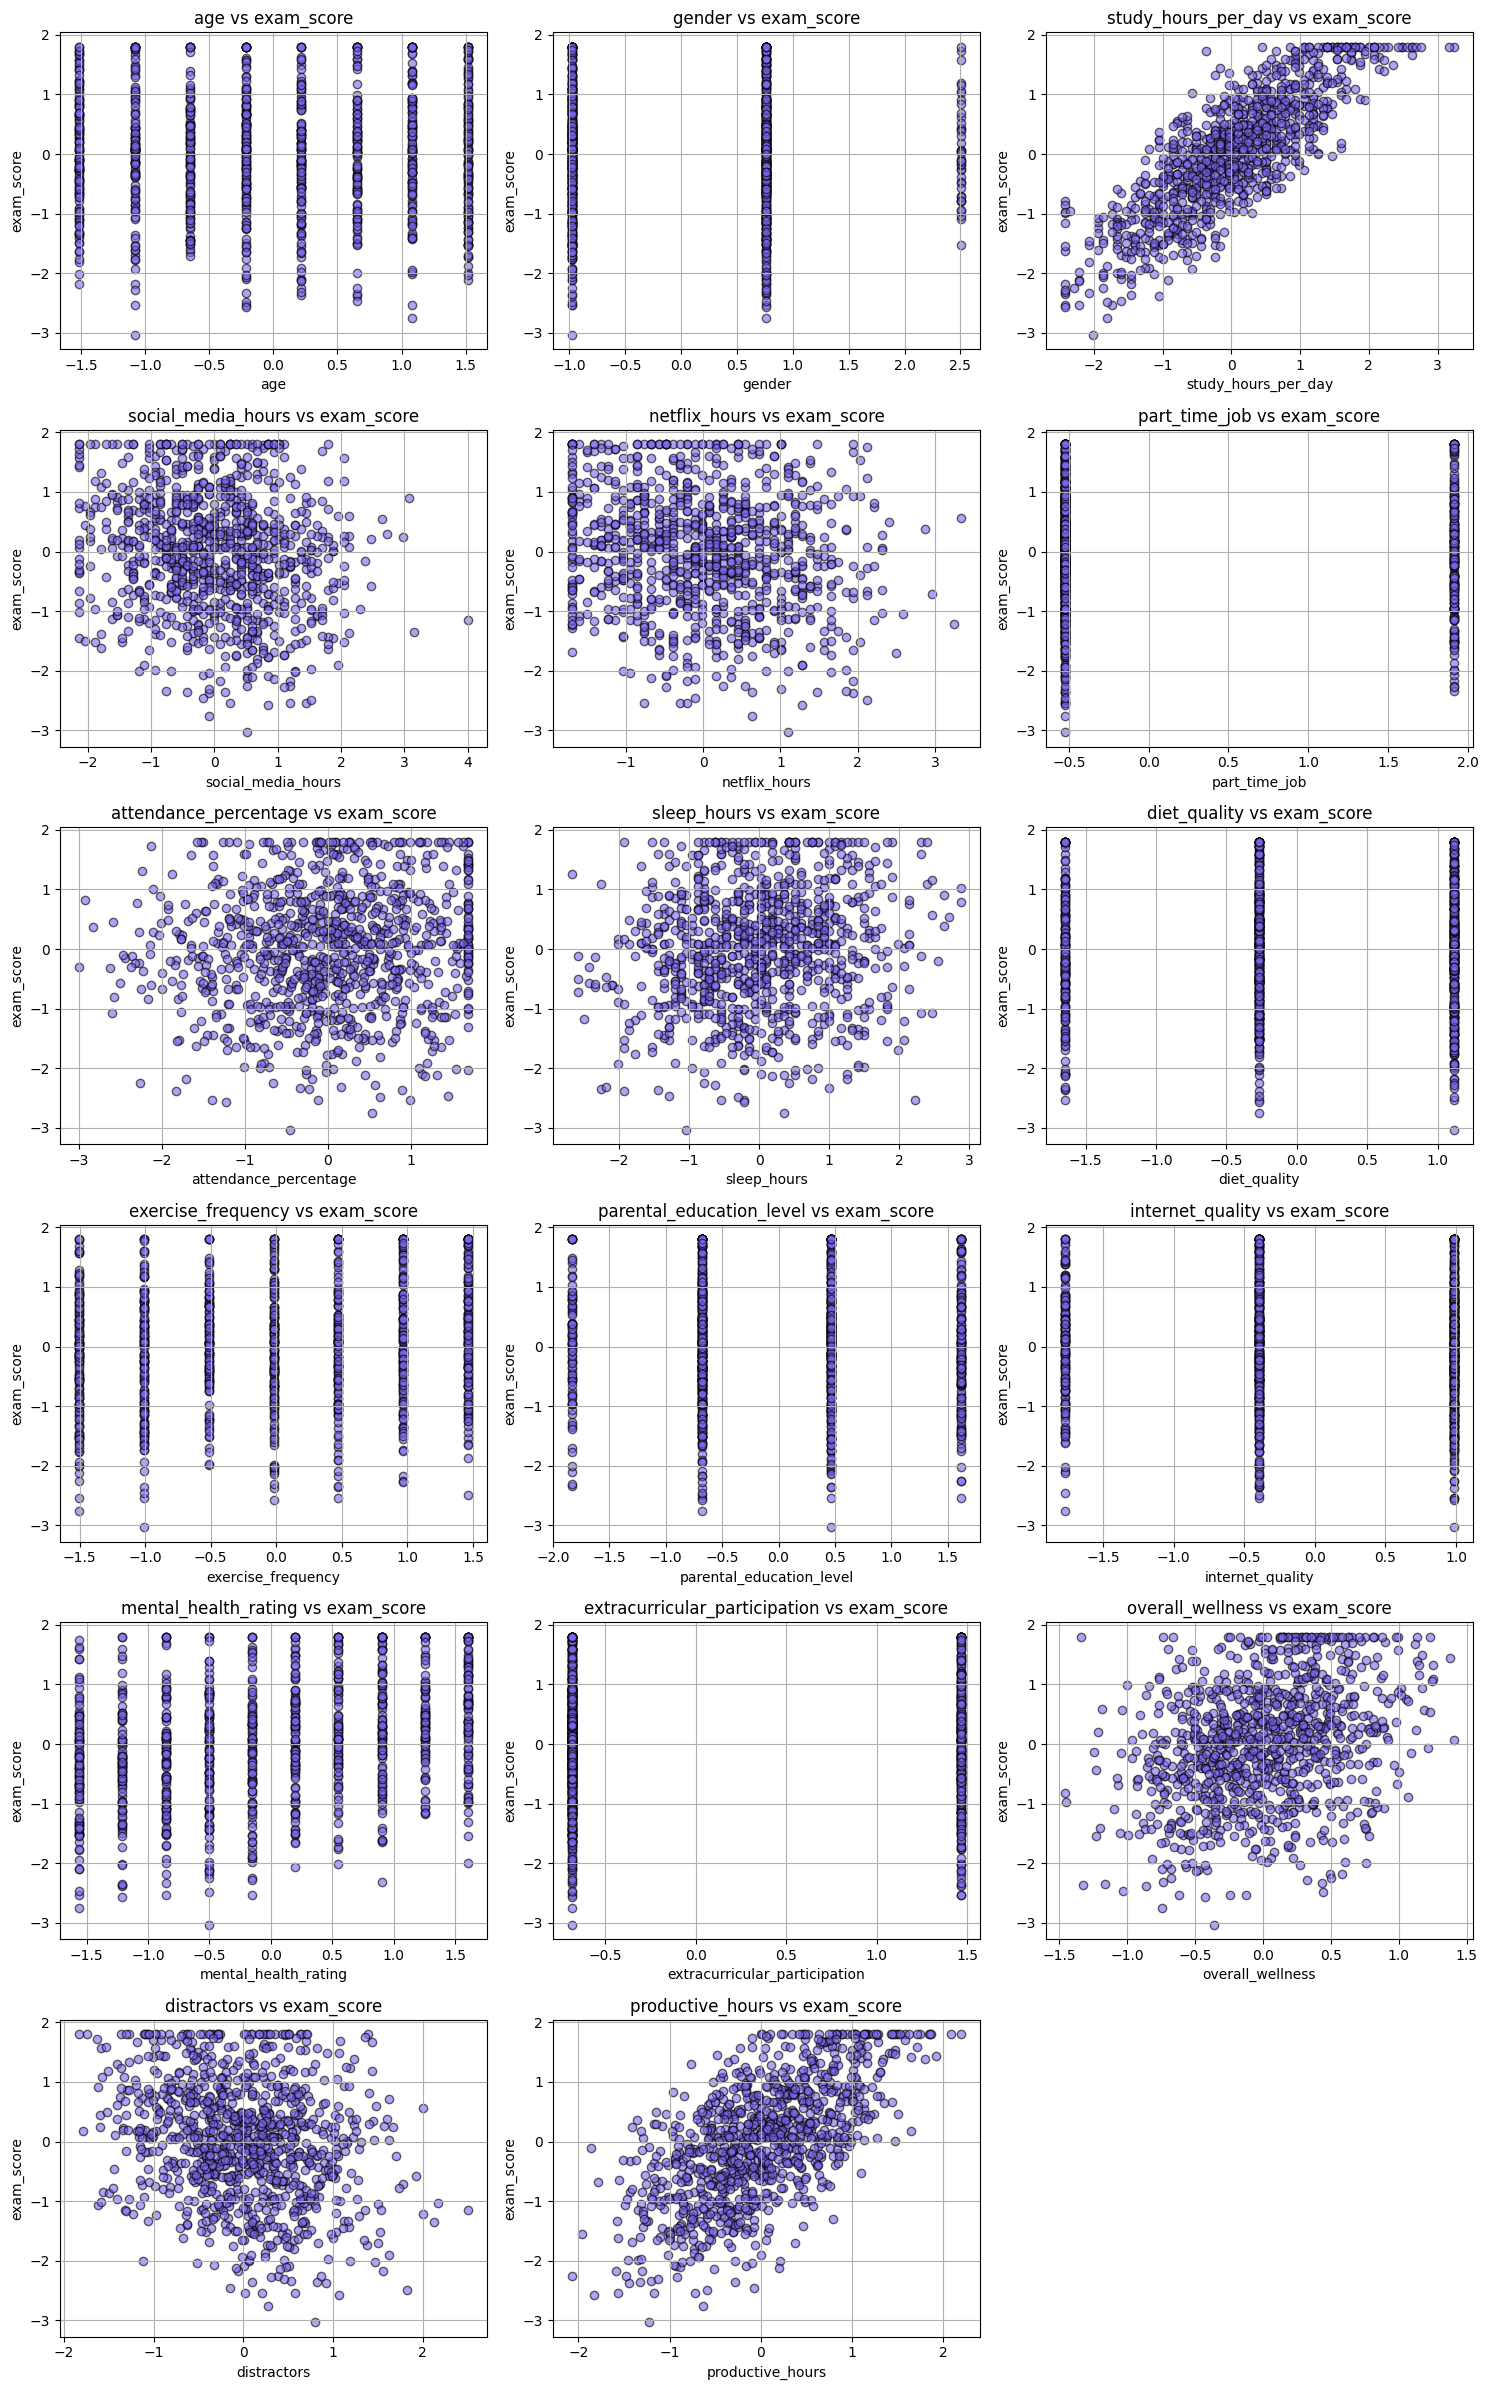

In [494]:
# Target column
target = 'exam_score'

# All features except 'exam_score'
features_to_plot = [col for col in scaled_features.columns if col != target]

# Grid dimensions
num_features = len(features_to_plot)
cols = 3
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each feature vs. exam_score
for i, col in enumerate(features_to_plot):
    axes[i].scatter(scaled_features[col], scaled_features[target], alpha=0.6,
                    color='mediumslateblue', edgecolor='black')
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].grid(True)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Feature vs Exam Score Box Plot**

---



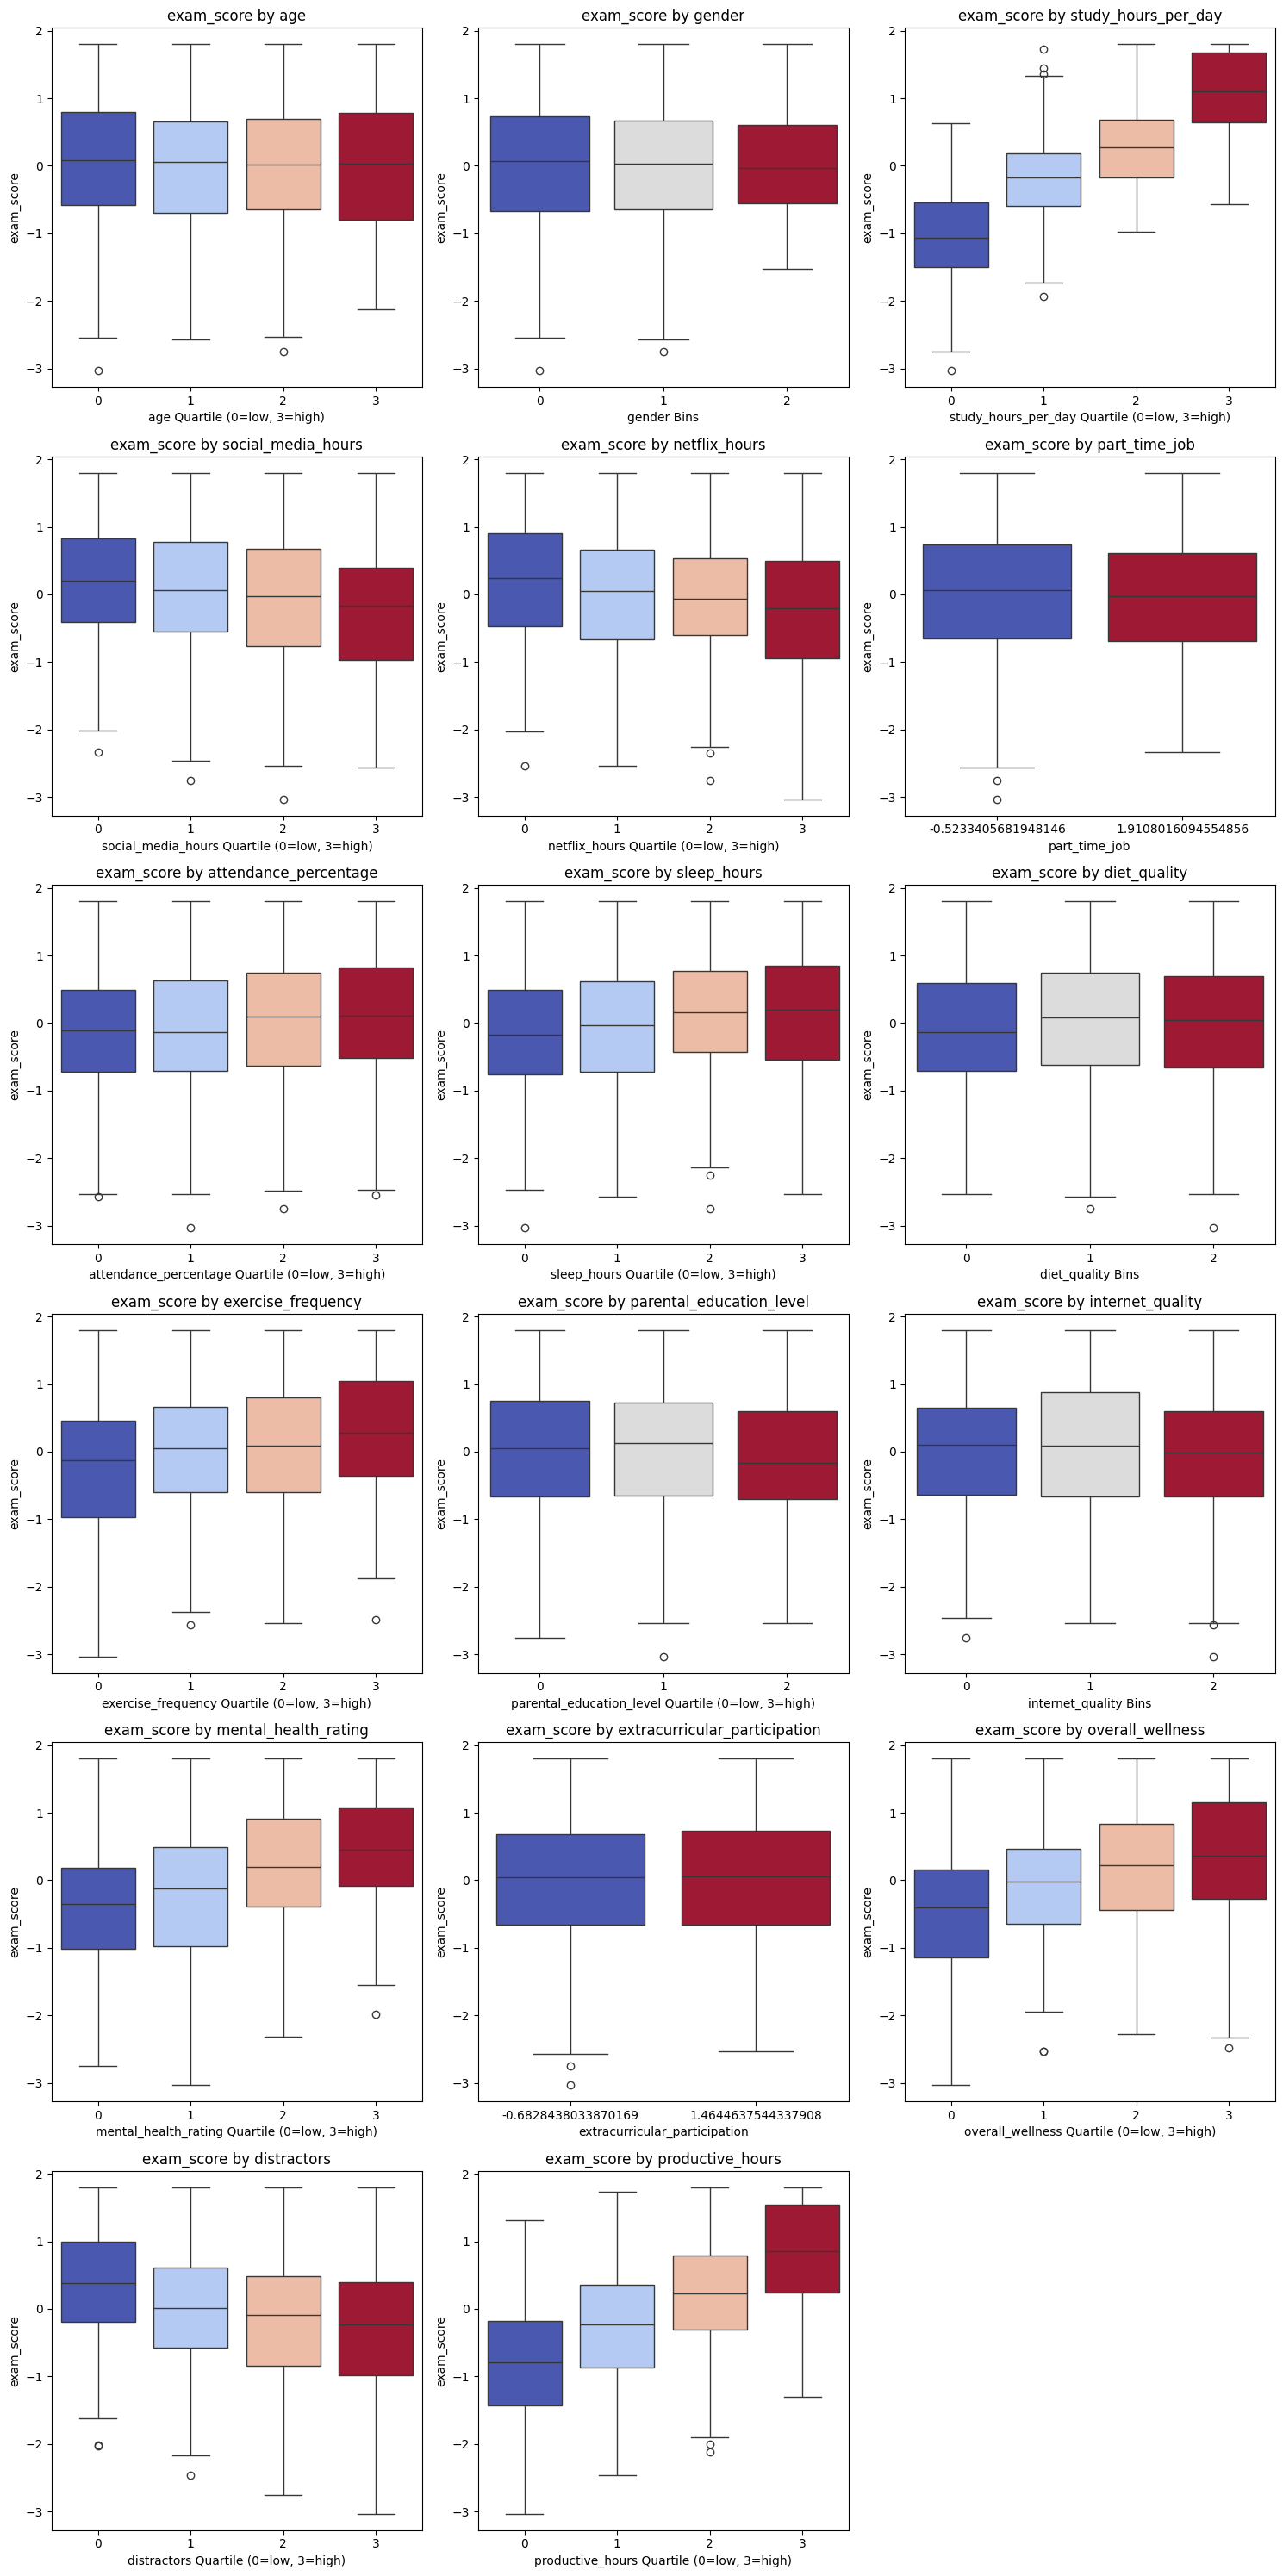

In [495]:
# Setup
target = 'exam_score'
features_to_plot = [col for col in scaled_features.columns if col != target]
num_features = len(features_to_plot)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    unique_vals = scaled_features[feature].nunique()

    # Decide how to bin: qcut for diverse features, cut or none for simpler ones
    if unique_vals >= 4:
        binned = pd.qcut(scaled_features[feature], q=4, labels=False, duplicates='drop')
        bin_label = f'{feature} Quartile (0=low, 3=high)'
    elif unique_vals >= 3:
        binned = pd.cut(scaled_features[feature], bins=unique_vals, labels=False)
        bin_label = f'{feature} Bins'
    else:
        binned = scaled_features[feature]  # Use original binary
        bin_label = feature

    sns.boxplot(
        x=binned,
        y=scaled_features[target],
        hue=binned,
        legend=False,
        ax=axes[i],
        palette='coolwarm'
    )

    axes[i].set_title(f'{target} by {feature}')
    axes[i].set_xlabel(bin_label)
    axes[i].set_ylabel(target)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Feature Correlation HeatMap**

---



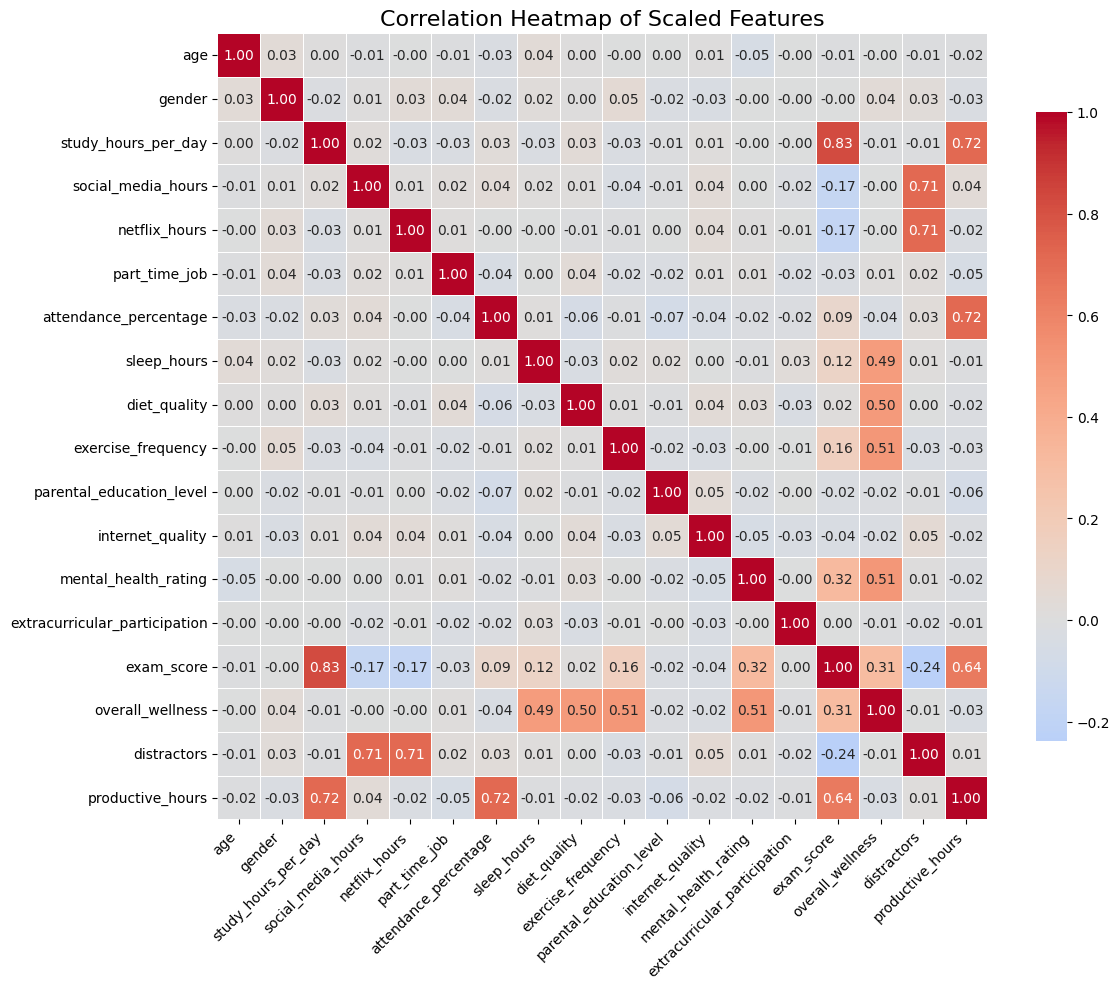

In [496]:
# Compute correlation matrix
corr_matrix = scaled_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,         # show the actual correlation values
    fmt=".2f",          # format to 2 decimal places
    cmap="coolwarm",    # color gradient
    center=0,           # center around zero
    linewidths=0.5,     # optional: add grid lines
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Scaled Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **4. Clustering (Unsupervised Learning)**

---



### **Apply K-Means clustering using lifestyle features (excluding exam score)**

---



In [497]:
#Imports requried
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [498]:
#Create the DF without exam_score and set it as X
X = scaled_features.drop(columns=['exam_score'])

### **Determine optimal K using:**

---



#### **Elbow method (Inertia Plot)**
The sharpest drop is 2 (and 3 is still acceptable)

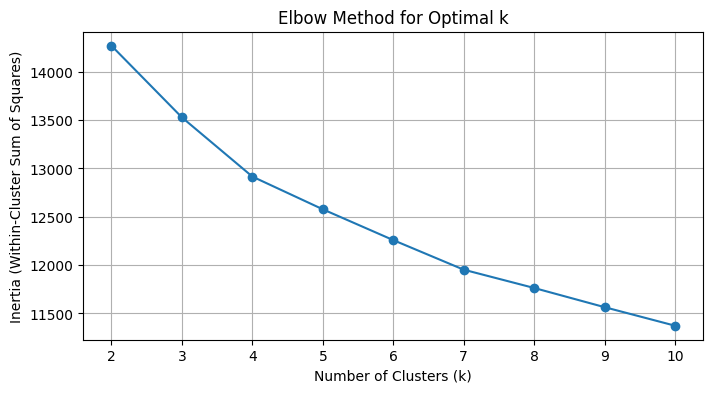

In [499]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=23, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#### **Silhoutte Score**
The best k is 3 according to Silhoutte Score

k=2 → Silhouette Score: 0.0623
k=3 → Silhouette Score: 0.0634
k=4 → Silhouette Score: 0.0606
k=5 → Silhouette Score: 0.0576
k=6 → Silhouette Score: 0.0548
k=7 → Silhouette Score: 0.0548
k=8 → Silhouette Score: 0.0519
k=9 → Silhouette Score: 0.0518
k=10 → Silhouette Score: 0.0509


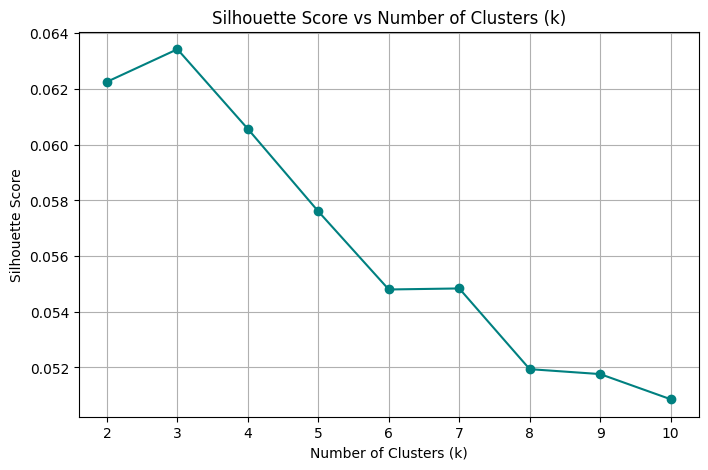

In [500]:
# Test k from 2 to 10
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k} → Silhouette Score: {score:.4f}')

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='teal')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [501]:
# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X)

# Assign cluster labels to the original scaled_features DataFrame
scaled_features['cluster'] = cluster_labels

### **K-Means Clustering labelling and description**

---


After running and determining the characteristics of each cluster, the display was redone with the discovered cluster labels.

the following was determined:

1. There are 3 distinct groups, a Distracted Low Achievers group, a Balanced and Health-Focused group, and a Highly (Extracurricular) Involved group.

2. The balanced group had higher performance overall, followed by the involved group, and the least likely to perform group was the distracted group.

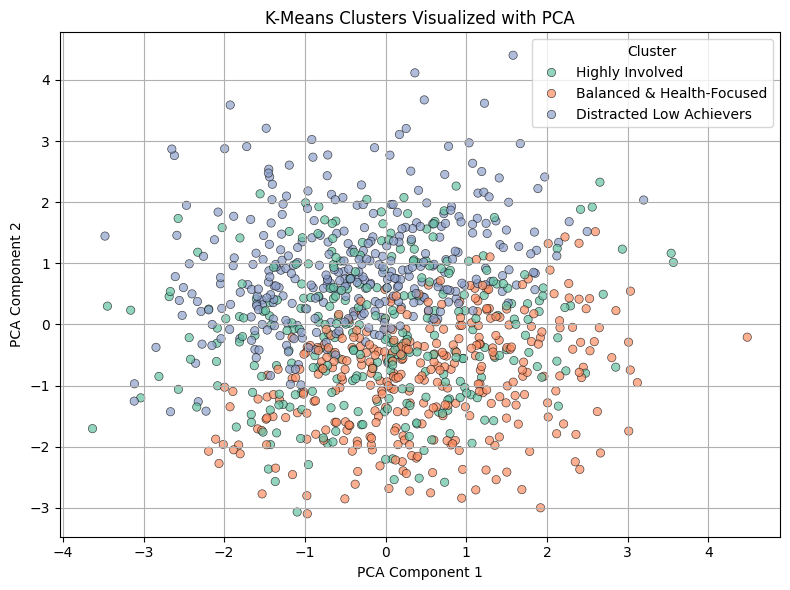

In [502]:
# Step 1: Exclude non-feature columns
X = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')

# Step 2: Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X_pca is now a (num_samples, 2) NumPy array

#Cluster label (Re-inputted after determining)
cluster_labels = {
    0: 'Distracted Low Achievers',
    1: 'Balanced & Health-Focused',
    2: 'Highly Involved'
}
scaled_features['cluster_label'] = scaled_features['cluster'].map(cluster_labels)

# Wrap X_pca into a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = scaled_features['cluster_label']

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster_label',
                palette='Set2', edgecolor='black', alpha=0.7)

plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

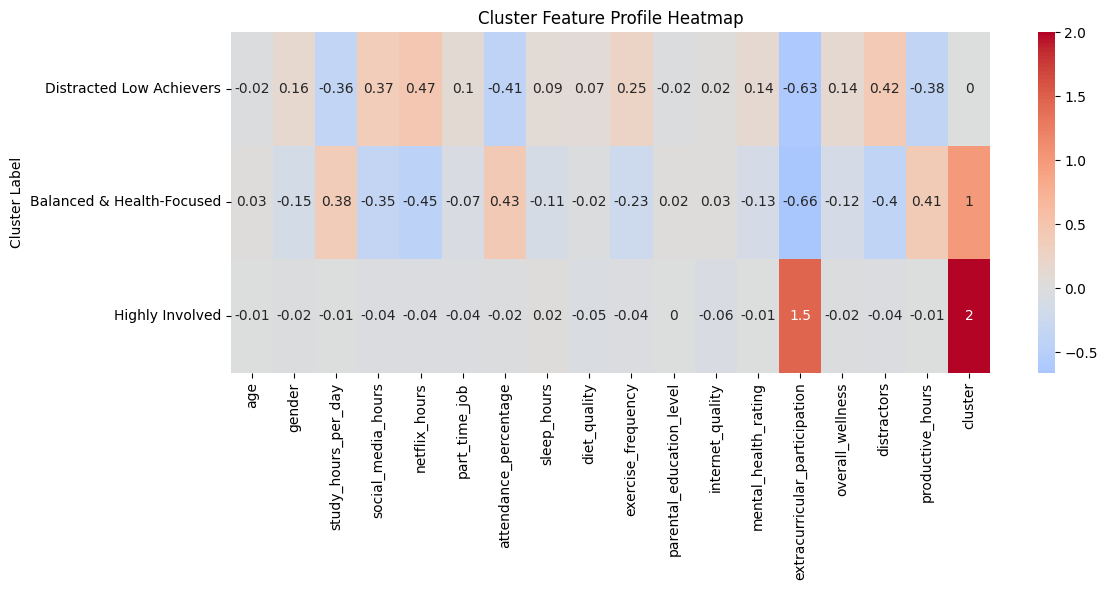

In [503]:
# Exclude non-numeric columns before taking the mean
numeric_columns = scaled_features.select_dtypes(include='number').columns
cluster_summary = scaled_features[numeric_columns].groupby(scaled_features['cluster']).mean().round(2)

# Map cluster numbers to descriptive labels
cluster_labels = {
    0: 'Distracted Low Achievers',
    1: 'Balanced & Health-Focused',
    2: 'Highly Involved'
}
cluster_summary.index = cluster_summary.index.map(cluster_labels)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.drop(columns=['exam_score']), annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Feature Profile Heatmap')
plt.ylabel('Cluster Label')
plt.tight_layout()
plt.show()

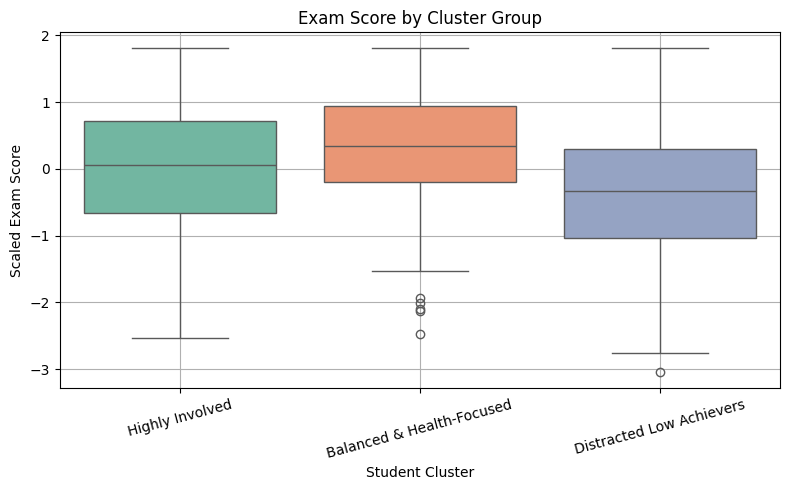

In [504]:
cluster_labels = {
    0: 'Distracted Low Achievers',
    1: 'Balanced & Health-Focused',
    2: 'Highly Involved'
}

scaled_features['cluster_label'] = scaled_features['cluster'].map(cluster_labels)

plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_label', y='exam_score', hue='cluster_label',
            data=scaled_features, palette='Set2', legend=False)

plt.title('Exam Score by Cluster Group')
plt.ylabel('Scaled Exam Score')
plt.xlabel('Student Cluster')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

## **5. Regression Analysis (Supervised Learning)**

---



### **Using Linear Regression**

---



In [505]:
#Necessary imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import numpy as np

#### **Train/Test split 70/30**

---



In [506]:
# Feature matrix and target for regression
X_reg = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y_reg = scaled_features['exam_score']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42) #70:30 split

In [507]:
# Initialize and train
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

#### **Model Evaluation (Linear Regression Train/Test Split)**

---



In [508]:
#Model Evaluation
# Predict on test set
y_pred_reg = lr_reg.predict(X_test_reg)

# Validation metrics
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

# Display results
print(f'Mean Absolute Error (MAE): {mae_reg:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse_reg:.3f}')
print(f'R-squared (R²) Score: {r2_reg:.3f}')


Mean Absolute Error (MAE): 0.251
Root Mean Squared Error (RMSE): 0.315
R-squared (R²) Score: 0.898


#### **Cross-Validation (Linear Regression)**

---



In [509]:
# Run 5-fold cross-validation on the full regression data
cv_scores_r2 = cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {cv_scores_r2}')
print(f'Mean R²: {cv_scores_r2.mean():.3f}')

Cross-validated R² scores: [0.89167859 0.91260846 0.88840235 0.90323429 0.88622728]
Mean R²: 0.896


#### **Model Evaluation (Linear Regression Cross-Validation)**

---



In [510]:
# R² (native support)
cv_r2 = cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring='r2')
print(f'R² Scores (CV): {cv_r2}')
print(f'Mean R²: {cv_r2.mean():.3f}\n')

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae = cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)
print(f'MAE Scores (CV): {-cv_mae}')  # negate for readability
print(f'Mean MAE: {-cv_mae.mean():.3f}\n')

# RMSE (via custom scorer)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
cv_rmse = cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)
print(f'RMSE Scores (CV): {-cv_rmse}')
print(f'Mean RMSE: {-cv_rmse.mean():.3f}')

R² Scores (CV): [0.89167859 0.91260846 0.88840235 0.90323429 0.88622728]
Mean R²: 0.896

MAE Scores (CV): [0.23989561 0.24945876 0.25271578 0.25819348 0.26871989]
Mean MAE: 0.254

RMSE Scores (CV): [0.30809579 0.32344125 0.32809246 0.31573704 0.32024574]
Mean RMSE: 0.319


#### **Result Visualization (Linear Regression)**

---



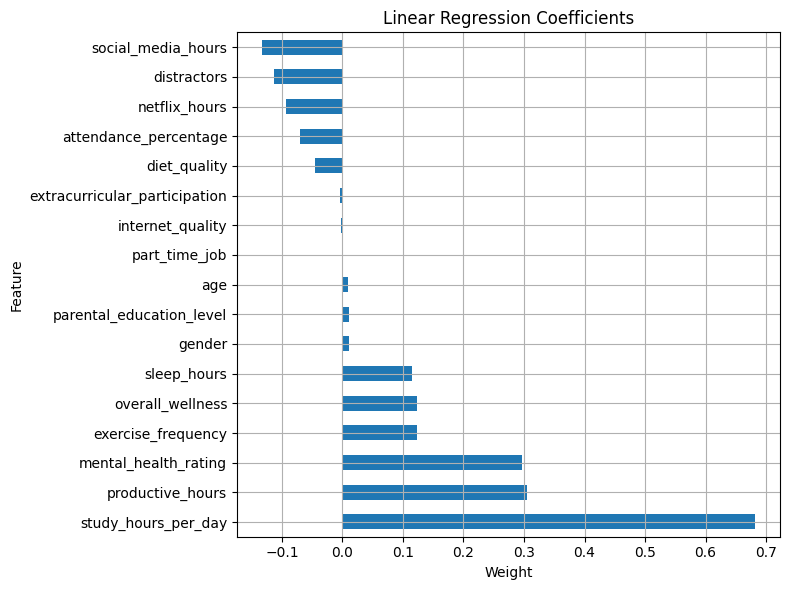

In [511]:
# Coefficients (Single Train/Split)
coef_reg = pd.Series(lr_reg.coef_, index=X_reg.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
coef_reg.plot(kind='barh')
plt.title('Linear Regression Coefficients')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

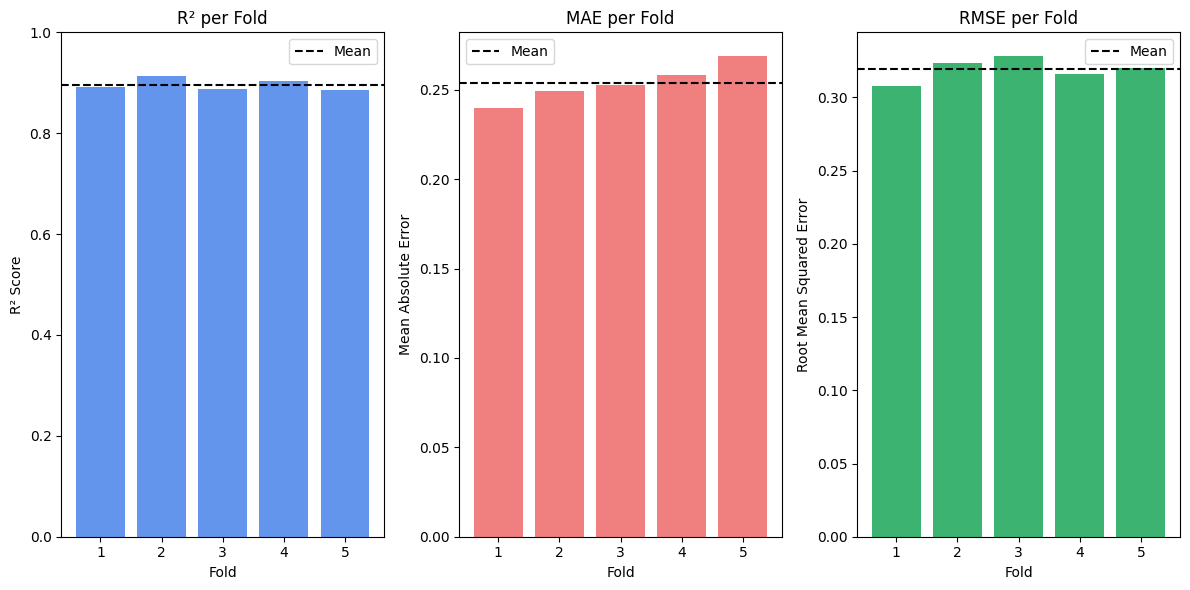

In [512]:
#For Cross-Validation
# Negate MAE and RMSE scores for readability
cv_mae_pos = -cv_mae
cv_rmse_pos = -cv_rmse

# Plotting setup
folds = np.arange(1, 6)

plt.figure(figsize=(12, 6))

# Plot R²
plt.subplot(1, 3, 1)
plt.bar(folds, cv_r2, color='cornflowerblue')
plt.axhline(np.mean(cv_r2), color='black', linestyle='--', label='Mean')
plt.title('R² per Fold')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.bar(folds, cv_mae_pos, color='lightcoral')
plt.axhline(np.mean(cv_mae_pos), color='black', linestyle='--', label='Mean')
plt.title('MAE per Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Plot RMSE
plt.subplot(1, 3, 3)
plt.bar(folds, cv_rmse_pos, color='mediumseagreen')
plt.axhline(np.mean(cv_rmse_pos), color='black', linestyle='--', label='Mean')
plt.title('RMSE per Fold')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

### **Decision Tree Regressor**

---



In [513]:
#Necessary Imports
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

In [514]:
# Initialize and train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_reg, y_reg) #Reusing the 70/30 split done before

DecisionTreeRegressor(random_state=42)

#### **Model Evaluation (Decision Tree Regressor 70/30 split)**

---



In [515]:
# R² Score
cv_r2_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring='r2')

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)

# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
cv_rmse_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)

# Show results
print(f"Mean R² (Tree):   {cv_r2_tree.mean():.3f}")
print(f"Mean MAE (Tree):  {-cv_mae_tree.mean():.3f}")
print(f"Mean RMSE (Tree): {-cv_rmse_tree.mean():.3f}")

Mean R² (Tree):   0.686
Mean MAE (Tree):  0.431
Mean RMSE (Tree): 0.554


#### **Model Visualization (Decision Tree Regressor 70/30 split)**

---



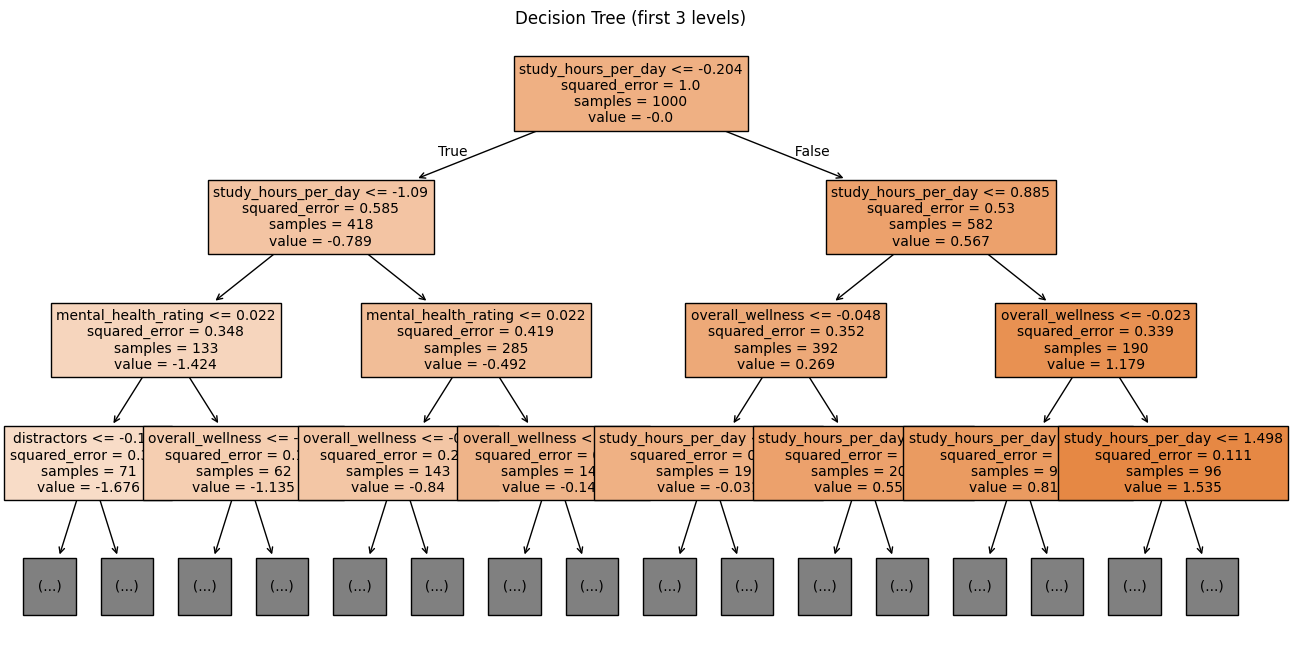

In [516]:
plt.figure(figsize=(16, 8))
plot_tree(tree_reg, feature_names=X_reg.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (first 3 levels)")
plt.show()

#### **Model Evaluation (GridCV DecisionTreeRegressor)**

---



In [517]:
# Custom scorer for RMSE (or use 'neg_mean_squared_error')
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Define the grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_cv = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1,
    verbose=1
)

In [518]:
# Fit the grid search to find the best model and its parameters
grid_cv.fit(X_reg, y_reg)

# Get the best model from the grid search
best_tree_reg = grid_cv.best_estimator_

# Predict on the test set using the best model
y_pred_best_tree_reg = best_tree_reg.predict(X_test_reg)

# Calculate MAE, RMSE, and R^2 for the best model on the test set
mae_best_tree_reg = mean_absolute_error(y_test_reg, y_pred_best_tree_reg)
rmse_best_tree_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_tree_reg))
r2_best_tree_reg = r2_score(y_test_reg, y_pred_best_tree_reg)

# Print the evaluation metrics for the best model
print("\nEvaluation of Best Decision Tree Regressor (from GridSearchCV) on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_best_tree_reg:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_tree_reg:.3f}")
print(f"R-squared (R²) Score: {r2_best_tree_reg:.3f}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Evaluation of Best Decision Tree Regressor (from GridSearchCV) on Test Set:
Mean Absolute Error (MAE): 0.228
Root Mean Squared Error (RMSE): 0.299
R-squared (R²) Score: 0.908


#### **Model Visualization (GridCV DecisionTreeRegressor)**

---



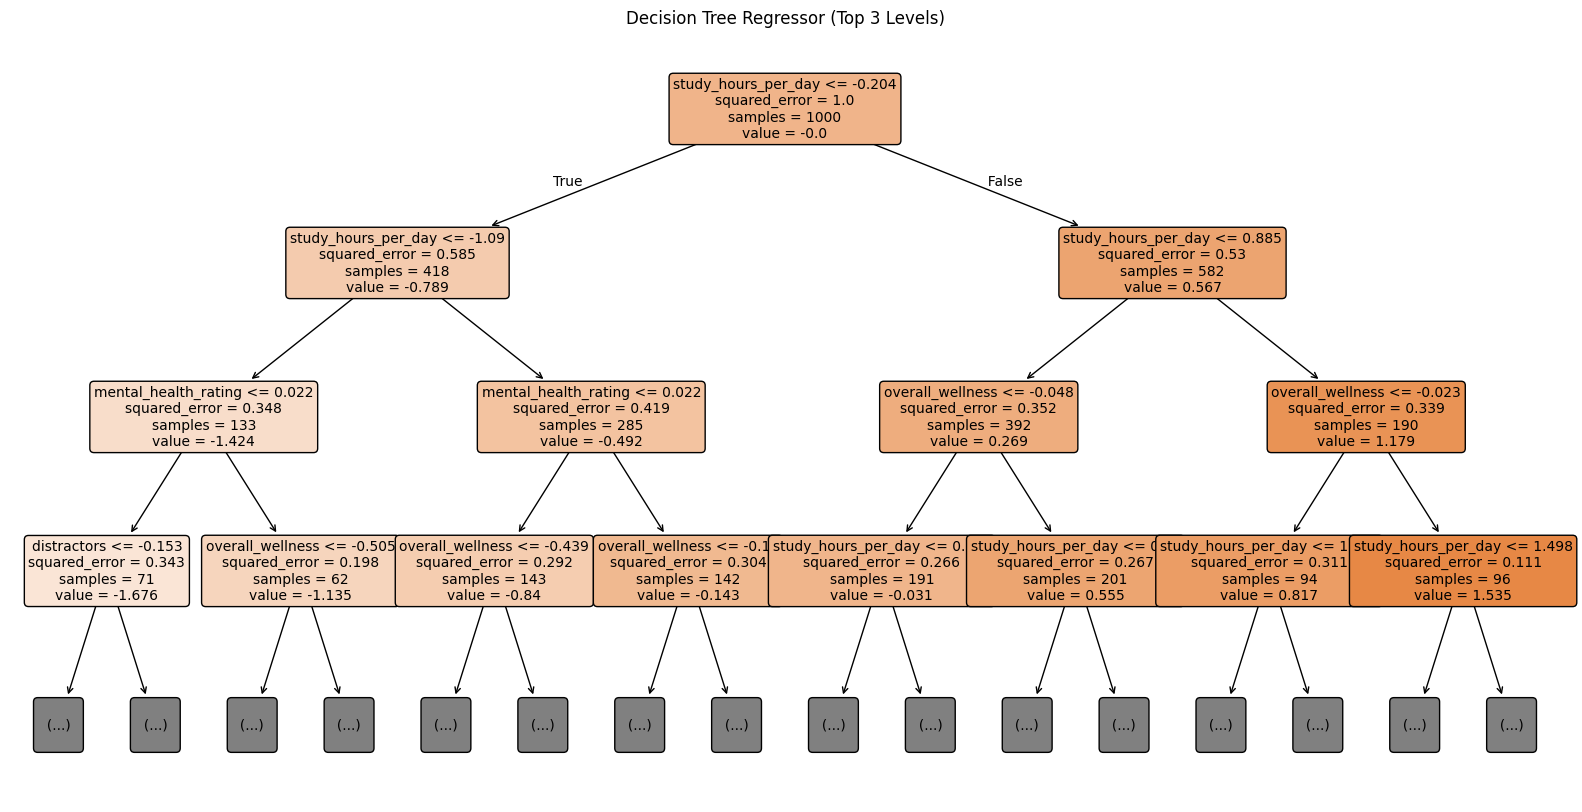

In [519]:
best_tree = grid_cv.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_reg.columns,
    filled=True,
    rounded=True,
    max_depth=3,          # Show only top 3 levels for readability
    fontsize=10
)
plt.title("Decision Tree Regressor (Top 3 Levels)")
plt.show()

### **Random Forest Regressor**

---



In [520]:
#Necessary Import
from sklearn.ensemble import RandomForestRegressor

In [521]:
# Initialize
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

# Fit to full dataset (optional pre-fit)
rf_reg.fit(X_reg, y_reg)

RandomForestRegressor(n_jobs=-1, random_state=42)

#### **Model Evaluation (Random Forest Regressor 70/30 split)**

---



In [522]:
# Predict on test set
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate
mae_rf_test = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf_test = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf_test = r2_score(y_test_reg, y_pred_rf)

print(f"Random Forest Test MAE:  {mae_rf_test:.3f}")
print(f"Random Forest Test RMSE: {rmse_rf_test:.3f}")
print(f"Random Forest Test R²:   {r2_rf_test:.3f}")

Random Forest Test MAE:  0.100
Random Forest Test RMSE: 0.129
Random Forest Test R²:   0.983


#### **Model Evaluation (Random Forest Regressor Cross-Validation)**

---



In [523]:
# R²
cv_r2_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring='r2')

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)

# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
cv_rmse_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)

# Display
print(f'Mean R² (RF):    {cv_r2_rf.mean():.3f}')
print(f'Mean MAE (RF):   {-cv_mae_rf.mean():.3f}')
print(f'Mean RMSE (RF):  {-cv_rmse_rf.mean():.3f}')

Mean R² (RF):    0.862
Mean MAE (RF):   0.295
Mean RMSE (RF):  0.368


In [524]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_reg, y_reg)
best_rf = grid_rf.best_estimator_

print("Best Parameters (RF):", grid_rf.best_params_)
print("Best CV RMSE (RF):", -grid_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters (RF): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE (RF): 0.3656937294508157


#### **Model Evaluation (Random Forest Regressor Grid Search Cross-Validation)**

---



In [525]:
y_pred_best_rf = best_rf.predict(X_test_reg)

mae_best_rf = mean_absolute_error(y_test_reg, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_rf))
r2_best_rf = r2_score(y_test_reg, y_pred_best_rf)

print(f"Best RF (GridSearchCV) Test MAE:  {mae_best_rf:.3f}")
print(f"Best RF (GridSearchCV) Test RMSE: {rmse_best_rf:.3f}")
print(f"Best RF (GridSearchCV) Test R²:   {r2_best_rf:.3f}")

Best RF (GridSearchCV) Test MAE:  0.115
Best RF (GridSearchCV) Test RMSE: 0.150
Best RF (GridSearchCV) Test R²:   0.977


#### **Model Visualization (Random Forest Regressor)**

---



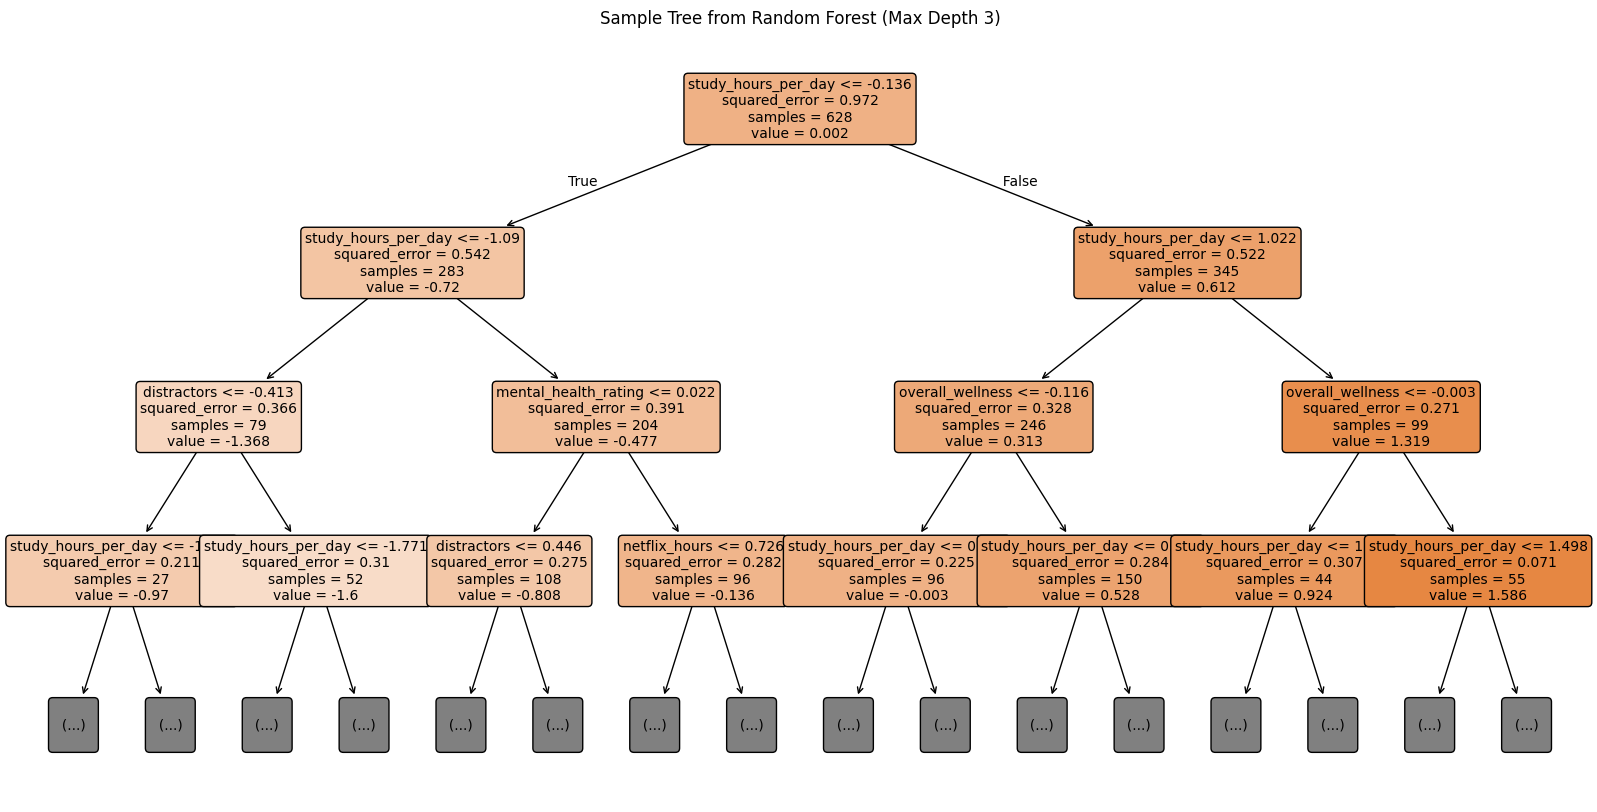

In [526]:
# Pick a single tree (e.g., the 0th one)
single_tree = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_reg.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Sample Tree from Random Forest (Max Depth 3)")
plt.show()

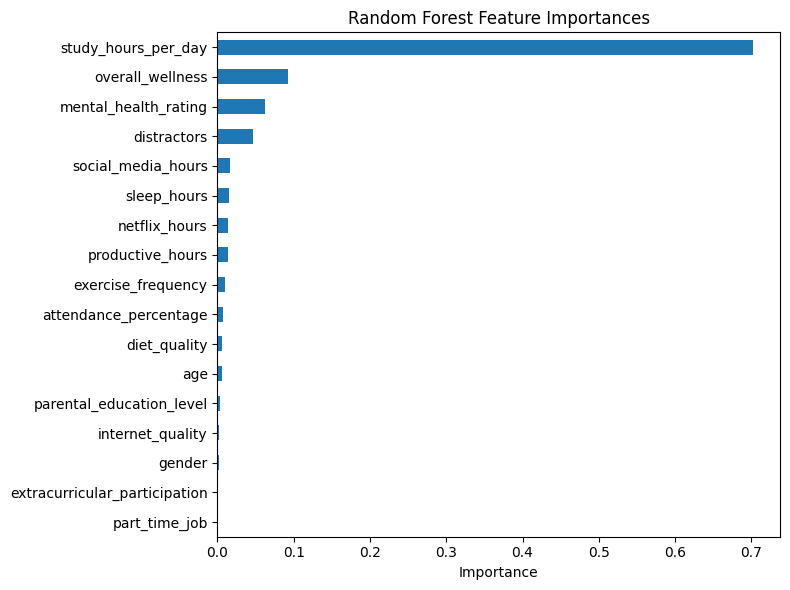

In [527]:
#Feature Importance
best_rf = grid_rf.best_estimator_

importances = pd.Series(best_rf.feature_importances_, index=X_reg.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## **6. Optional Classification Task**

---



In [528]:
#Necessary Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### **Classification of Data into performance_group**

---



In [529]:
# Compute thresholds based on percentiles
lower_bound = scaled_features['exam_score'].quantile(0.33)
upper_bound = scaled_features['exam_score'].quantile(0.67)

# Define function to assign group
def performance_tier(score):
    if score <= lower_bound:
        return 'Low'
    elif score <= upper_bound:
        return 'Average'
    else:
        return 'High'

# Apply and add column
scaled_features['performance_group'] = scaled_features['exam_score'].apply(performance_tier)
scaled_features['performance_group'].value_counts(normalize=True)

performance_group
Average    0.338
Low        0.332
High       0.330
Name: proportion, dtype: float64

#### **Decision Tree Classification 70/30 Split**

---



In [530]:
#Train Split Classification, Drop the excluded feature columns and set target as column of performance_group
X_class = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label', 'performance_group'], errors='ignore')
y_class = scaled_features['performance_group']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.3, random_state=42, stratify=y_class)

#### **Decision Tree Classification Model Evaluation**

---



In [531]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_cls, y_train_cls)

y_pred_cls = tree_clf.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred_cls))

              precision    recall  f1-score   support

     Average       0.62      0.58      0.60       101
        High       0.78      0.73      0.75        99
         Low       0.75      0.85      0.80       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



#### **Decision Tree Classification (CV) Model Evaluation**

---



In [532]:
# Accuracy
cv_acc_tree = cross_val_score(tree_clf, X_class, y_class, cv=5, scoring='accuracy')

# F1 (macro)
cv_f1_tree = cross_val_score(tree_clf, X_class, y_class, cv=5, scoring='f1_macro')

# Print results
print(f"Decision Tree CV Accuracy:  {cv_acc_tree.mean():.3f} ± {cv_acc_tree.std():.3f}")
print(f"Decision Tree CV F1 (macro): {cv_f1_tree.mean():.3f} ± {cv_f1_tree.std():.3f}")

Decision Tree CV Accuracy:  0.692 ± 0.027
Decision Tree CV F1 (macro): 0.693 ± 0.026


#### **Decision Tree Classification (GridSearchCV) Model Evaluation**

---



In [533]:
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='f1_macro',  # main scorer
    n_jobs=-1,
    verbose=1
)
grid_tree.fit(X_train_cls, y_train_cls)

print("Best Tree Params:", grid_tree.best_params_)
print(f"Best Tree CV F1 (macro): {grid_tree.best_score_:.3f}")  # already using f1_macro

# Manually compute accuracy for the best model
best_tree_cls = grid_tree.best_estimator_
cv_acc_best_tree = cross_val_score(best_tree_cls, X_class, y_class, cv=5, scoring='accuracy')
print(f"Best Tree CV Accuracy:  {cv_acc_best_tree.mean():.3f} ± {cv_acc_best_tree.std():.3f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Tree Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Tree CV F1 (macro): 0.696
Best Tree CV Accuracy:  0.684 ± 0.047


#### **Decision Tree Classification Model Confusion Matrix**

---



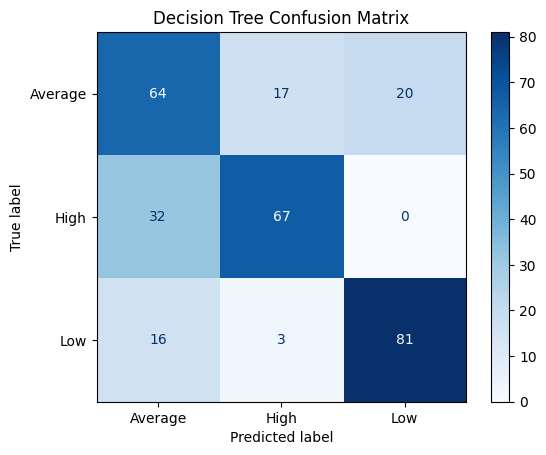

In [534]:
best_tree_cls = grid_tree.best_estimator_
y_pred_tree = best_tree_cls.predict(X_test_cls)

cm_tree = confusion_matrix(y_test_cls, y_pred_tree, labels=best_tree_cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=best_tree_cls.classes_)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### **Logistic Regression Model Evaluation**

---



In [535]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)  # no need for multi_class anymore
logreg.fit(X_train_cls, y_train_cls)

y_pred_log = logreg.predict(X_test_cls)

from sklearn.metrics import classification_report
print(classification_report(y_test_cls, y_pred_log))


              precision    recall  f1-score   support

     Average       0.70      0.73      0.72       101
        High       0.89      0.77      0.83        99
         Low       0.84      0.92      0.88       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



#### **Logistic Regression (CV) Model Evaluation**

---



In [536]:
logreg_cls = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_acc_log = cross_val_score(logreg, X_class, y_class, cv=5, scoring='accuracy')
cv_f1_log = cross_val_score(logreg, X_class, y_class, cv=5, scoring='f1_macro')

print(f"Logistic Regression CV Accuracy:  {cv_acc_log.mean():.3f} ± {cv_acc_log.std():.3f}")
print(f"Logistic Regression CV F1 (macro): {cv_f1_log.mean():.3f} ± {cv_f1_log.std():.3f}")

Logistic Regression CV Accuracy:  0.817 ± 0.027
Logistic Regression CV F1 (macro): 0.819 ± 0.028


#### **Logistic Regression (GridSearchCV) Model Evaluation**

---



In [537]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}
grid_log = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', max_iter=1000),
    param_grid=param_grid_log,
    cv=5,
    scoring='f1_macro',  # main scoring metric
    n_jobs=-1,
    verbose=1
)
grid_log.fit(X_train_cls, y_train_cls)

print("Best Logistic Params:", grid_log.best_params_)
print(f"Best Logistic CV F1 (macro): {grid_log.best_score_:.3f}")

# Compute accuracy manually on best estimator
best_log_cls = grid_log.best_estimator_
cv_acc_best_log = cross_val_score(best_log_cls, X_class, y_class, cv=5, scoring='accuracy')
print(f"Best Logistic CV Accuracy:  {cv_acc_best_log.mean():.3f} ± {cv_acc_best_log.std():.3f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Logistic Params: {'C': 100, 'penalty': 'l2'}
Best Logistic CV F1 (macro): 0.806
Best Logistic CV Accuracy:  0.815 ± 0.029


#### **Logistic Regression Model Confusion Matrix**

---



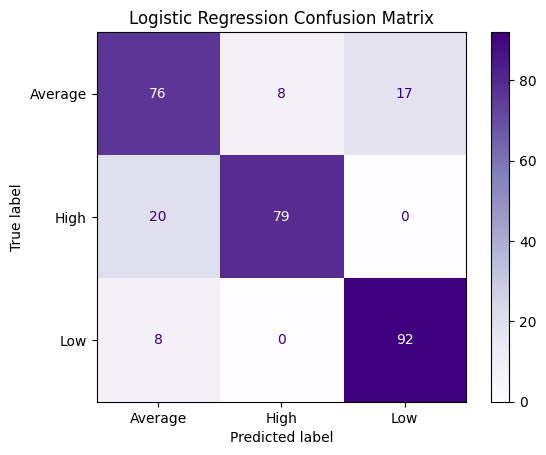

In [538]:
best_log_cls = grid_log.best_estimator_
y_pred_log = best_log_cls.predict(X_test_cls)

cm_log = confusion_matrix(y_test_cls, y_pred_log, labels=best_log_cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=best_log_cls.classes_)
disp.plot(cmap='Purples')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

---
# **IV. Interpretation and Insights**



---



## **A. Feature Importance**

Feature Importance
• For tree-based models, plot and analyze feature importance
• For linear models, interpret coefficients
• Identify the top 3–5 features that most affect performance

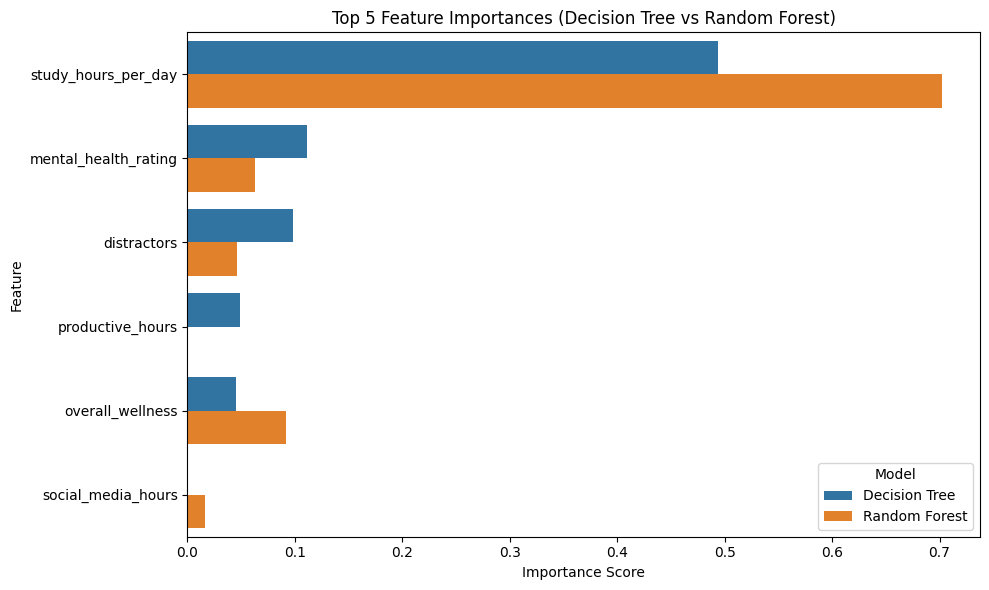

In [539]:
# Step 1: Extract feature importances from both models
dt_importances = pd.Series(best_tree_cls.feature_importances_, index=X_class.columns)
rf_importances = pd.Series(best_rf.feature_importances_, index=X_class.columns)

# Step 2: Get top 5 from each
top5_dt = dt_importances.sort_values(ascending=False).head(5)
top5_rf = rf_importances.sort_values(ascending=False).head(5)

# Step 3: Create tidy DataFrame for plotting
df_plot = pd.concat([
    top5_dt.rename('Importance').to_frame().assign(Model='Decision Tree'),
    top5_rf.rename('Importance').to_frame().assign(Model='Random Forest')
]).reset_index().rename(columns={'index': 'Feature'})

# Step 4: Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Importance', y='Feature', hue='Model')
plt.title("Top 5 Feature Importances (Decision Tree vs Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Noticeably, from the plots provided the most important features for tree-based models are as follows:

1. **Study Hours Per Day** - Tops both **Decision Tree** and **Random Forest Models** (a recurring theme even with linear models)

2. **Mental Health Rating - Decision Tree** and **Overall Wellnes (Engineered Feature) - Random Forest**

3. **Distractors (Engineered Feature) - by Decision Tree** and **Mental Health Rating - by Random Forest**

4. **Overall Wellness - by Decision Tree** and **Distractors - by Random Forest**

5. **Productive Hours - by Decision Tree** and **Social Media Hours - by Random Forest**

---



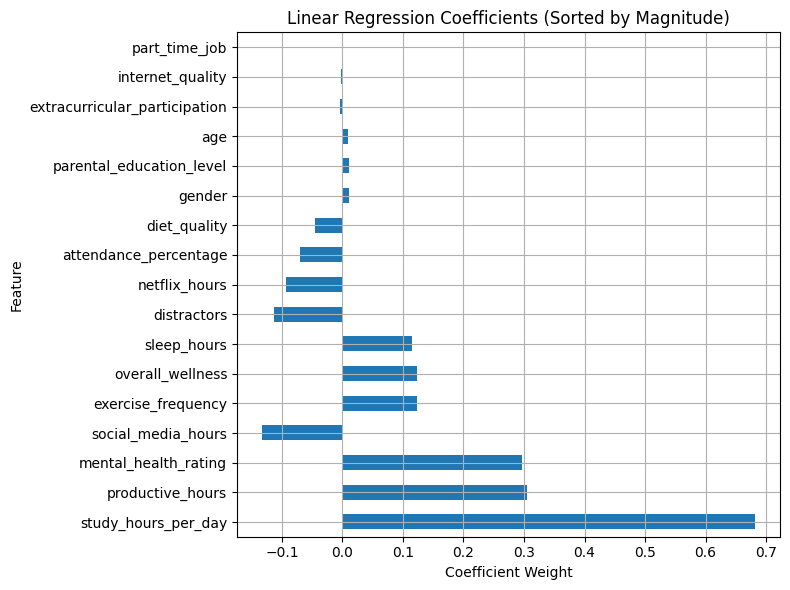

In [540]:
# Sort coefficients by absolute value (magnitude)
coef_reg = pd.Series(lr_reg.coef_, index=X_reg.columns).sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 6))
coef_reg.plot(kind='barh')
plt.title('Linear Regression Coefficients (Sorted by Magnitude)')
plt.xlabel('Coefficient Weight')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


For the linear models the 5 most prominent (by magnitude) coefficients are
1. **Study Hours Per Day (positive)**
2. **Productive Hours (Engineered Feature)(positive)**
3. **Mental Health Rating (positive)**
4. **Social Media Hours (negative)**
5. **Exercise frequency tied with Overall Wellness (Engineered Feature)(positive)**

---



## **B. Cluster Profiling**

The optimal K produced by the data was around 2-3 with **k=3** being the chosen value due to passing both Silhoutte and Elbow Method.

There were 3 clusters that formed and the following are their descriptions:

1. **"Disctracted Low Achiever"**: The group which can be described as having: **(1) Low Productive Time, (2) High Distractor Time, (3) Lowest average exam score, (4)Moderate High healthy habits, (5) Low Extracurricular Involvement**

2. **Balanced & Health-Focused**: The group which can be described as having: **(1) High Productive Time, (3) Low Distractor Time, (3) Highest Average Exam Score, (4) Moderately Low healthy Habits, (5) Low Extracurricular Involvement**

3. **Highly Involved**: The group which can be described as having: **(1) Average Productive Time, (3) Avearage Distractor Time, (3) Average Average Exam Score, (4) Average healthy Habits, (5) Very High Involvement with Extracurriculars**

In [541]:
#Average Exam Score Grouped by Cluster
scaled_features.groupby('cluster_label')['exam_score'].mean().round(3)

cluster_label
Balanced & Health-Focused    0.364
Distracted Low Achievers    -0.357
Highly Involved              0.001
Name: exam_score, dtype: float64

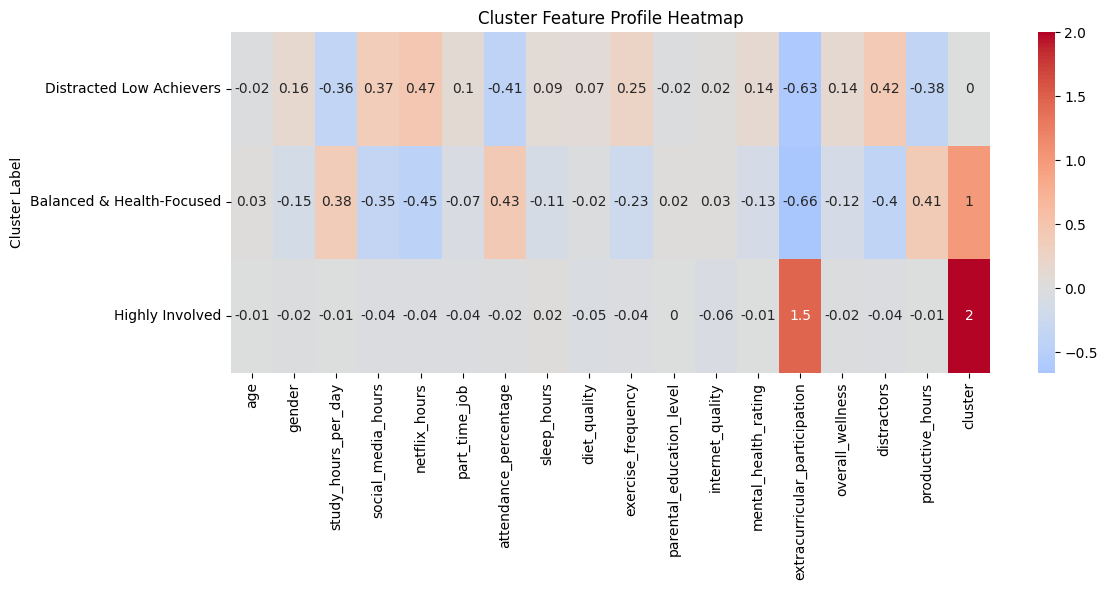

In [542]:
# Exclude non-numeric columns before taking the mean
numeric_columns = scaled_features.select_dtypes(include='number').columns
cluster_summary = scaled_features[numeric_columns].groupby(scaled_features['cluster']).mean().round(2)

# Map cluster numbers to descriptive labels
cluster_labels = {
    0: 'Distracted Low Achievers',
    1: 'Balanced & Health-Focused',
    2: 'Highly Involved'
}
cluster_summary.index = cluster_summary.index.map(cluster_labels)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.drop(columns=['exam_score']), annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Feature Profile Heatmap')
plt.ylabel('Cluster Label')
plt.tight_layout()
plt.show()

## **C. Model Performance**

### Model Evaluation Summary: Regression

Based on the updated evaluation metrics, the **Random Forest Regressor**, especially the version tuned using **GridSearchCV**, clearly outperforms the other models in predicting `exam_score`.

---

#### Reasoning:

- **Task Type**: The objective is to predict a continuous variable (`exam_score`), so regression models are appropriate.
- **Key Metrics**:
  - **R²**: Measures variance explained (closer to 1 is better).
  - **MAE**: Mean Absolute Error — average prediction error (lower is better).
  - **RMSE**: Root Mean Squared Error — penalizes larger errors (lower is better).

---

#### Model Comparison

| Model                           | Mean R² | Mean MAE | Mean RMSE |
|----------------------------------|---------|----------|-----------|
| **Linear Regression (CV)**       | 0.896   | 0.254    | 0.319     |
| **Decision Tree Regressor (CV)** | 0.686   | 0.431    | 0.554     |
| **Decision Tree (GridSearchCV)** | 0.908       | 0.228        | 0.299     |
| **Random Forest Regressor (CV)** | 0.862   | 0.295    | 0.368     |
| **Random Forest (GridSearchCV, Test Set)** | **0.977** | **0.115** | **0.150** |

---

#### Conclusion:

The **GridSearch-tuned Random Forest Regressor** demonstrates:
- The **lowest MAE** (0.115)
- The **lowest RMSE** (0.150)
- The **highest R²** (0.977)

These results show it offers the **most accurate predictions** and captures the **greatest variance** in `exam_score`, outperforming both Linear Regression and Decision Tree models.

---

###  Trade-Off: Interpretability vs Accuracy

Yes — in machine learning, there's often a trade-off between **how interpretable** a model is and **how accurate** it can be.

---

####  Interpretable Models (Easy to Understand)

- **Examples**: Linear Regression, Logistic Regression, Shallow Decision Trees
- **Pros**:
  - You can explain how the model makes decisions
  - Easy to present to non-technical stakeholders
  - Transparent — every feature's impact is visible
- **Cons**:
  - May miss complex, non-linear patterns in data
  - Usually **less accurate** on complex tasks

---

####  High-Accuracy Models (Complex, Powerful)

- **Examples**: Random Forest, Gradient Boosting, Neural Networks
- **Pros**:
  - Can capture complex relationships between features
  - Often yield much better performance (e.g., higher R², lower error)
- **Cons**:
  - Act like "black boxes" — hard to explain why a prediction was made
  - Require extra tools (e.g., feature importance plots, SHAP) to interpret

---

####  Project Example

| Model                  | Accuracy     | Interpretability |
|------------------------|--------------|------------------|
| Linear Regression      |  Good       | Very clear     |
| Decision Tree          |  Moderate   |  Intuitive rules |
| Random Forest (Tuned)  | Excellent |  Black box       |

> **Random Forest** model performed the best (R² = 0.977),  
> but it's **harder to explain** than simpler models like linear regression.

---

#### When to Prioritize What?

| If you need...                      | Use...                            |
|------------------------------------|------------------------------------|
| Clear explanations (reports, policies) | Interpretable models (LogReg, Tree) |
| Best predictions (e.g., scoring engines) | High-accuracy models (RF, XGBoost) |
| A balance of both                  | Use feature importance or explainability tools |

---

### Final Thought:

> The more complex the model, the better it might predict —  
> but the harder it is to **explain why** it made that prediction.

---




## **D. Real World Implications**


---



### 1. **What advice could you give students based on your findings?**

- Whether your priority lies in health like exercise and diet, extracurriculars like leadership roles or quizzers, or in making ends-meet like part-time jobs you will still pass your exams if you put in the time to review.
- Distractors do affect your scores, so find balance and prioritize studying if you are at-risk. But it's still acceptable to indulge in such activities.

---



### 2. **Are there surprising or counter-intuitive results?**

- Almost everything aligns with common preconception except how little extracurriculars and part-time jobs affect scores. It all comes down to effort and fundamentals.
- Albeit, my personal experience was my scores dwindled when I had extracuriculars, the data says otherwise.

---

